Youtube Video Link : https://www.youtube.com/watch?v=nNkKTJTu-mU

# Imports

In [2]:
!pip install pandas_datareader

     |████████████████████████████████| 109 kB 2.8 MB/s eta 0:00:01


In [4]:
!pip install mplfinance

     |████████████████████████████████| 73 kB 922 kB/s eta 0:00:01


In [5]:
!pip install yfinance

     |████████████████████████████████| 59 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 13.2 MB/s eta 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.dates as mdates
import datetime as dt
import mplfinance as mpf
import yfinance as yfin

# Function that Saves Stock Data to CSV

In [2]:
def save_to_csv(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    yfin.pdr_override()

    df = web.get_data_yahoo(ticker, start, end) # we overided with yfinance
    df.to_csv("/Users/rish/Finance/Finance_YouTube/" + ticker + ".csv") # check if this works, do you need to add file path?

    return df

In [4]:
# Testing function

save_to_csv('GOOGL', 2020, 1, 1, 2021, 1, 1)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...
2020-12-24,86.449997,87.120499,86.217499,86.708000,86.708000,9312000
2020-12-28,87.245499,89.349998,87.091003,88.697998,88.697998,27650000
2020-12-29,89.361504,89.423500,87.755501,87.888000,87.888000,19726000


# Function for DF from CSV

In [3]:
def get_df(ticker):
    try:
        df = pd.read_csv(ticker+ ".csv")
    except FileNotFoundError:
        print("File not found")
    else :
        return df

In [4]:
df = get_df("GOOGL")

In [5]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,0,2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000,NaN
1,1,2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000,-0.005231
2,2,2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000,0.026654
3,3,2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000,-0.001932
4,4,2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000,0.007118


# Daily Return Data

In [6]:
def daily_return(df, ticker):
    df["daily_return"] = (df['Adj Close']/df['Adj Close'].shift(1)) - 1
    df.to_csv("/Users/rish/Finance/Finance_YouTube/" + ticker + ".csv")
    return df

In [9]:
daily_return(df, "GOOGL") # first column doesn't have day before

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000,NaN
1,2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000,-0.005231
2,2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000,0.026654
3,2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000,-0.001932
4,2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000,0.007118
...,...,...,...,...,...,...,...,...
248,2020-12-24,86.449997,87.120499,86.217499,86.708000,86.708000,9312000,0.003431
249,2020-12-28,87.245499,89.349998,87.091003,88.697998,88.697998,27650000,0.022951
250,2020-12-29,89.361504,89.423500,87.755501,87.888000,87.888000,19726000,-0.009132
251,2020-12-30,88.250000,88.388000,86.400002,86.812500,86.812500,21026000,-0.012237


# Returns over specific time period

In [7]:
def return_over_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]

    return (days * daily_ret)

In [8]:
total_return = return_over_time(df, 2020, 1, 1, 2021, 1, 1)
print(f"Total Return: {total_return * 100}%")

Total Return: 18.88625491724113%


# MPL Finance

In [15]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    # Download csv file
    try:
        df = pd.read_csv(ticker+ ".csv")
    except FileNotFoundError:
        print("File not found")
    else :
        df.index = pd.DatetimeIndex(df["Date"])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub, type = 'candle') # Candle plot 
        mpf.plot(df_sub, type = 'line') # simple plot price change line
        mpf.plot(df_sub, type = 'ohlc', mav = 4) # Moving data average
        
        # Style
        s = mpf.make_mpf_style(base_mpf_style = "charles", rc={'font.size':8})
        fig = mpf.figure(figsize = (12, 8), style = s)

        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2, sharex = ax)
        mpf.plot(df_sub, type = chart_type, mav = (3,5,7), ax = ax, volume = av, show_nontrading = True)



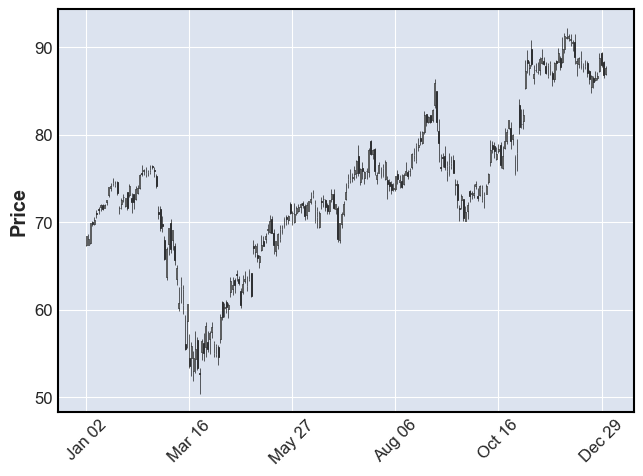

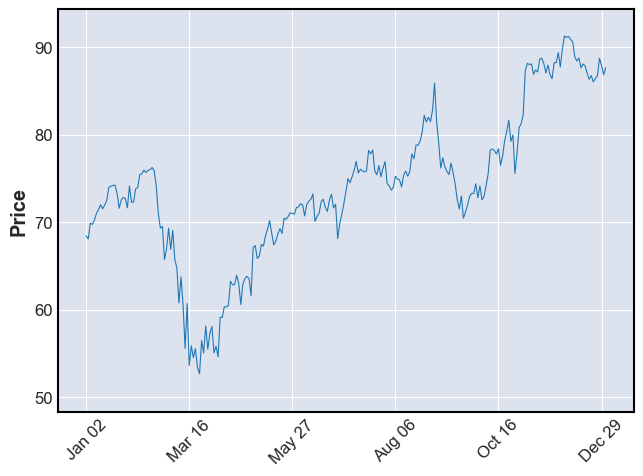

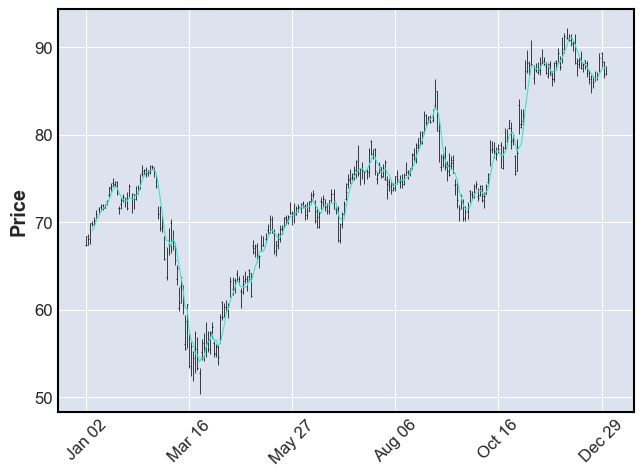

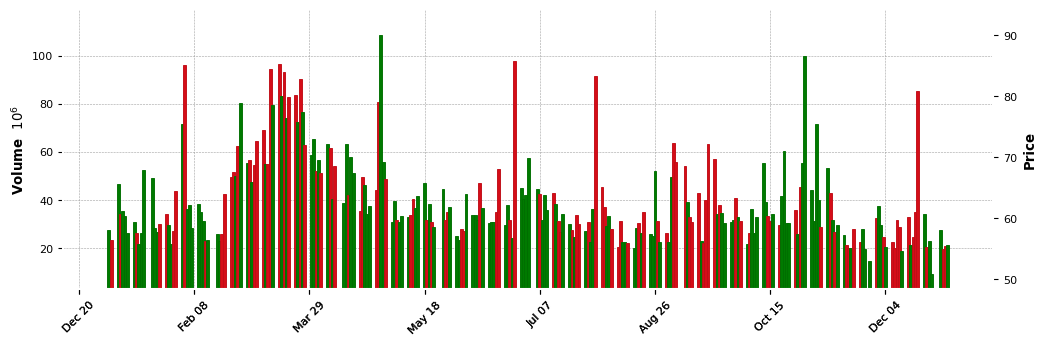

In [16]:
mplfinance_plot('GOOGL', 'ohlc', 2020, 1, 1, 2021, 1, 1)